In [10]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from manual_library.text_processing import tokenize_text,lemmatisasi_text
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
sns.set()


In [11]:
dataku = pd.read_csv('lemma.csv')
dataku.head()

,full_text,text_clean,label,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"['soal', 'temu', 'ganjar', 'airlangga', 'tutup...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"['meski', 'sepi', 'berita', 'ganjar', 'airlang...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"['hebat', 'kali', 'udel', 'ganti', 'ganjar', '...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"['jadi', 'ganjar', 'wapres']",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"['muharam', 'sama', 'ganjar']",muharam ganjar


In [12]:
#tokenisasi text dan ditempatkan pada satu kolom baru
dataku['tokens'] = dataku['text_clean'].apply(lambda x: tokenize_text(x))
dataku.head() 


,full_text,text_clean,label,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]",muharam ganjar


In [13]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

dataku['lemma'] = dataku['tokens'].apply(lambda x: lemmatisasi_text(x,stopwords))
dataku.head()

,full_text,text_clean,label,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]",muharam ganjar


EDA 

In [14]:
print(f"Input data has {len(dataku)} rows and {len(dataku.columns)} columns")
print(f"label positif : {len(dataku[dataku['label']==1])} rows")
print(f"label negatif : {len(dataku[dataku['label']==2])} rows")
print(f"label netral : {len(dataku[dataku['label']==0])} rows") 

Input data has 704 rows and 5 columns
label positif : 275 rows
label negatif : 195 rows
label netral : 234 rows


<Axes: xlabel='label', ylabel='count'>

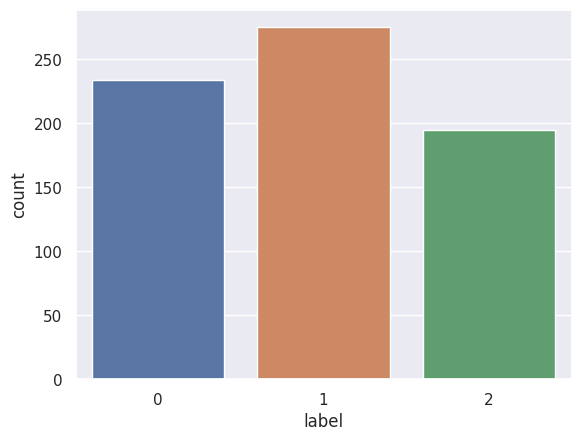

In [15]:
dataku["label"].isnull().sum()
sns.countplot(x='label', data=dataku)

In [16]:
data_negatif = dataku[dataku["label"]==2]
data_positif = dataku[dataku["label"]==1]
data_netral = dataku[dataku["label"]==0]

negatif_list = data_negatif["lemma"].tolist()
positif_list = data_positif["lemma"].tolist()
netral_list = data_netral["lemma"].tolist()

filtered_negatif = ("").join(str(negatif_list))
filtered_negatif = filtered_negatif.lower()

filtered_positif = ("").join(str(positif_list))
filtered_positif = filtered_positif.lower()

filtered_netral = ("").join(str(netral_list))
filtered_netral = filtered_netral.lower()


In [17]:
filtered_positif

"['muharam ganjar', 'ganjar pranowo', 'komando jokowi komando ganjar tetap data fakta sebar cinta penjuru negeri jokowi ajar rawan', 'ganjar calon', 'mantan panglima andika perkasa cawapres ganjar buka suara', 'lari ganjar judul budiman prabowo sakit hati akut nebar isu bohong', 'ganjar pilih kayak nasib kayak pakdhe jokowi nenek kunci kamar mandi nyalahin ganjar', 'hina klaim manusia bahagia bahagia manusia baik urus negara serah ahli ganjar pranowo baik bukti data fakta', 'ganjar pranowo politik uang politik identitas tarik simpati masyarakat elektabilitas ganjar tinggi masyarakat indonesia gubernur jateng dingin bal tidur bus', 'ganjar jokowi asli indonesia prabowo jokowi asli indonesia anies asli arab fakta bgitu maaf putra putri pribumi nusantara pimpin rakyat indonesia hancur yaman', 'siaga curang erick thohir terima masyarakat cawapres ganjar pranowo detail', 'dukung ganjar pranowo', 'ganjar pranowo presiden mulus jalan pesong gila rat ramal bodoh tolol goblok merdeka', 'rakyat 

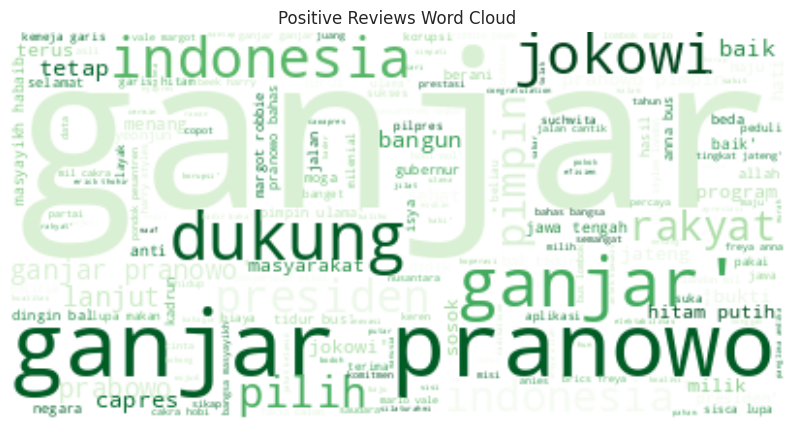

In [18]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

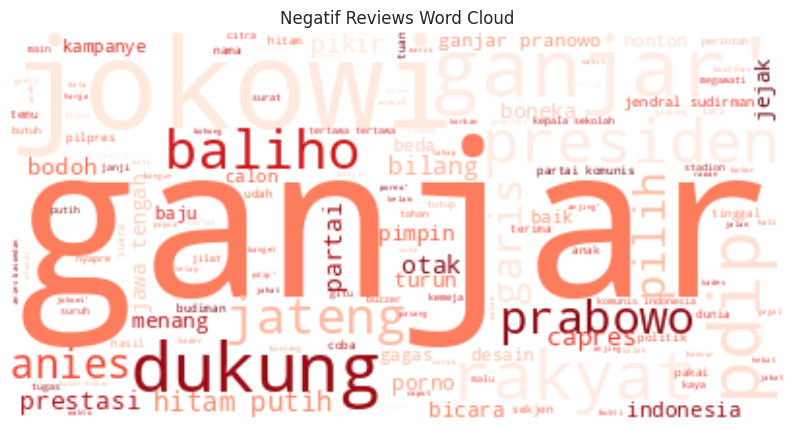

In [19]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Reviews Word Cloud")
plt.show()

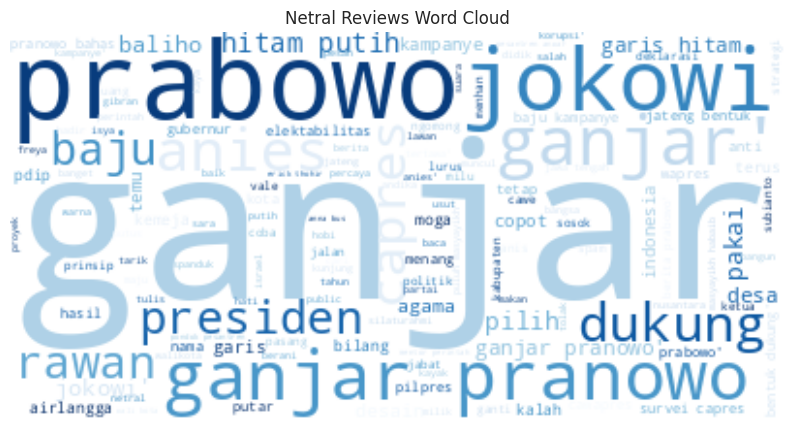

In [20]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_netral)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Netral Reviews Word Cloud")
plt.show()

In [21]:
x = dataku[['lemma']]
y = dataku['label']
print(x.shape)
print(y.shape)


(704, 1)
(704,)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(492, 1)
(212, 1)
(492,)
(212,)


In [23]:
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2

tfidf_train = tfidf.fit_transform(x_train['lemma'])

tfidf_test = tfidf.transform(x_test['lemma'])


X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())


X_train_vect.head()  

,0,1,2,3,4,5,6,7,8,9,...,520,521,522,523,524,525,526,527,528,529
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ALGORITMA: MULTINOMIAL NAIVE BAYES

              precision    recall  f1-score   support

           0       0.59      0.34      0.43        76
           1       0.52      0.80      0.63        84
           2       0.46      0.35      0.40        52

    accuracy                           0.52       212
   macro avg       0.52      0.50      0.49       212
weighted avg       0.53      0.52      0.50       212



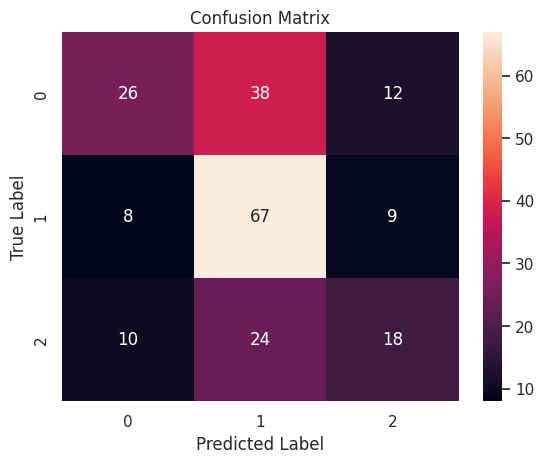

In [24]:
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

print(classification_report(y_test, naive_bayes_pred))

class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ALGORITMA: RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        76
           1       0.59      0.65      0.62        84
           2       0.43      0.44      0.44        52

    accuracy                           0.52       212
   macro avg       0.51      0.51      0.51       212
weighted avg       0.52      0.52      0.52       212



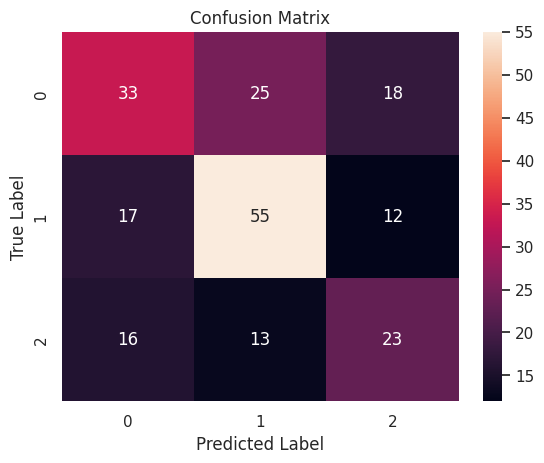

In [25]:
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.55      0.45      0.49        76
           1       0.61      0.69      0.65        84
           2       0.45      0.48      0.47        52

    accuracy                           0.55       212
   macro avg       0.54      0.54      0.54       212
weighted avg       0.55      0.55      0.55       212



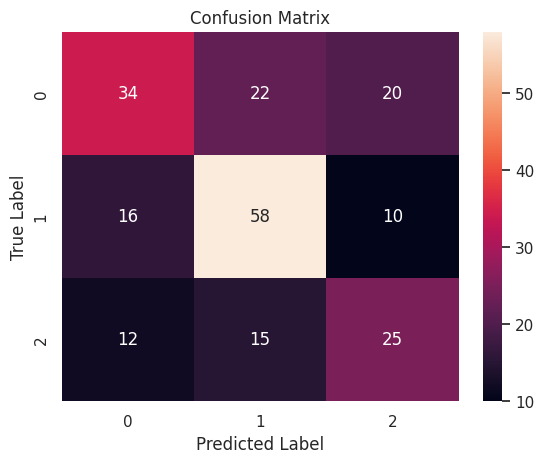

In [26]:
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ALGORITMA: SUPPORT VECTOR MACHINE(SVM)

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        76
           1       0.62      0.67      0.64        84
           2       0.42      0.42      0.42        52

    accuracy                           0.53       212
   macro avg       0.51      0.52      0.52       212
weighted avg       0.53      0.53      0.53       212



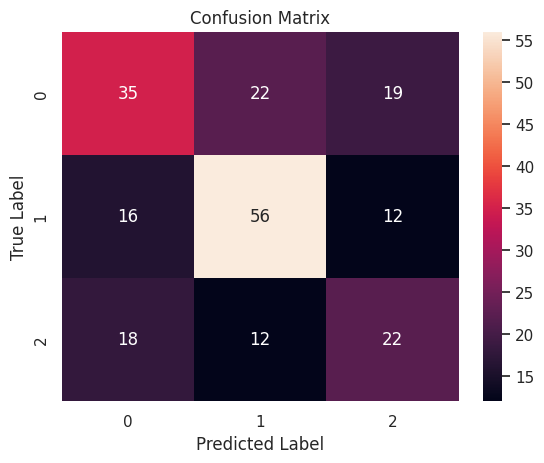

In [27]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.53      0.54      0.54        76
           1       0.58      0.60      0.59        84
           2       0.49      0.46      0.48        52

    accuracy                           0.54       212
   macro avg       0.53      0.53      0.53       212
weighted avg       0.54      0.54      0.54       212



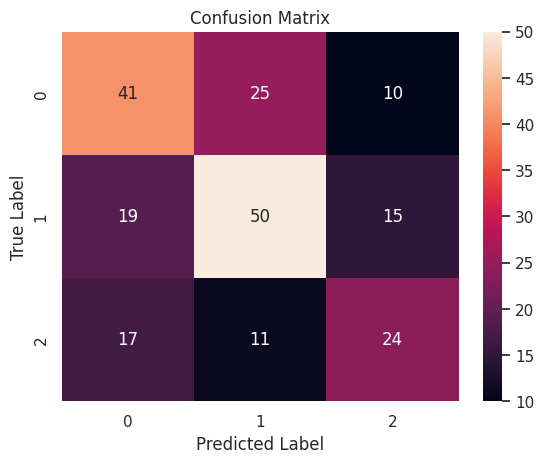

In [28]:
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()